In [433]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

%matplotlib inline

In [434]:
print('numpy: ', np.__version__)

numpy:  1.12.1


In [435]:
txt1 = 'http://archive.ics.uci.edu/ml/machine-learning-databases'
txt2 = '/heart-disease/processed.cleveland.data'
filename = txt1 + txt2
# column names for the data
colnames = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','num']

# read data to data frame
df = pd.read_csv(filename, 
                 names = colnames, 
                 na_values = '?')
df.head(10)

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [436]:
# Calculate descriptive statistics
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [437]:
# Check how many missing values are in each column
np.sum(np.isnan(df))

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64

In [438]:
# Missing values
# df = df.fillna(0)
# OR Replace the missing values with column mean values
df = df.where(~np.isnan(df), df.mean(), axis='columns')

df.shape

(303, 14)

In [439]:
# Calculate the output
labels = (df['num'] > 0).values   # O mean healthy, and 1/trure mean dissease

In [440]:
# Input data (convert to numberical value except for the last column)
columns = ['age','sex','cp','tresbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal']

data = df[columns].values
data.shape

(303, 13)

In [441]:
# Scale the data to between 1 and 0
min_max_scaler = preprocessing.MinMaxScaler()

data_scaled =  min_max_scaler.fit_transform(data)

In [442]:
# Check what were the scaler values
min_max_scaler.scale_

array([ 0.02083333,  1.        ,  0.33333333,  0.00943396,  0.00228311,
        1.        ,  0.5       ,  0.00763359,  1.        ,  0.16129032,
        0.5       ,  0.33333333,  0.25      ])

In [443]:
# Check the minimum values
min_max_scaler.min_

array([-0.60416667,  0.        , -0.33333333, -0.88679245, -0.28767123,
        0.        ,  0.        , -0.54198473,  0.        ,  0.        ,
       -0.5       ,  0.        , -0.75      ])

In [444]:
# Split the data into train and validate, leave 36% of the data to test
x_train, x_test, y_train, y_test = train_test_split(
    data_scaled, labels, test_size=0.36)

In [453]:
# Create the ANN model and train it

model =Sequential()
model.add(Dense(14, activation = 'relu', input_dim = 13))
model.add(Dense(14, activation = 'relu'))
#model.add(Dense(14, activation = 'relu'))
#model.add(Dense(14, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# N = number of epochs
N = 100
h = model.fit(x_train, y_train,
              verbose = 0, 
              epochs = N,
              batch_size = 128,
              validation_data=(x_test, y_test))

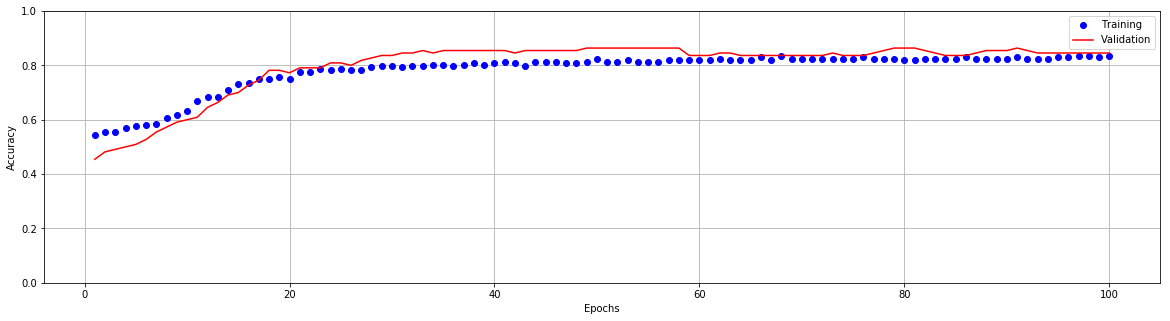

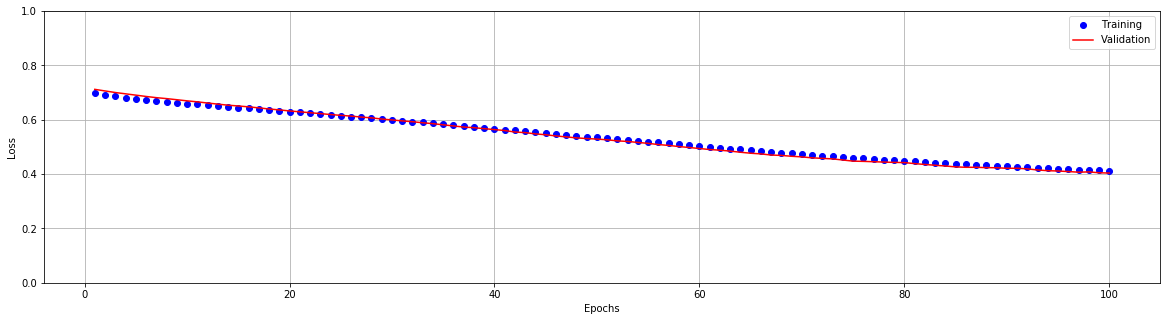

110/110 [==============================] - 0s 91us/step


[0.40376971526579425, 0.84545451944524597]

In [454]:
# Plot the results:
epochs = range(1, N +1)
acc = h.history['acc']
val_acc = h.history ['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, batch_size = 100)
score